# Decision Tree for Classification

1) Use sklearn make_moons data set and create a decision tree classifier using sklearn

2) Create decision tree classifier for diabetes data set

## 1) Use sklearn make_moons data set and create a decision tree classifier using sklearn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import tree

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, 
                  noise = 0.25, 
                  random_state=42)

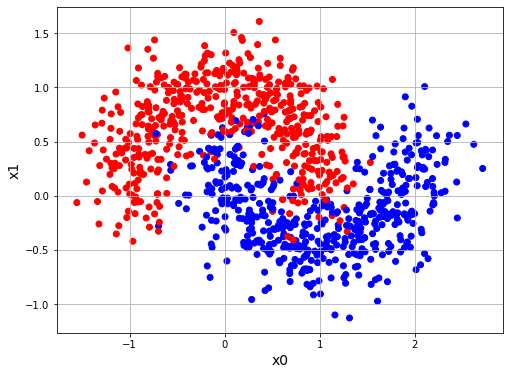

In [7]:
colors = ["red" if label == 0 else "blue" for label in y]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color = colors)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize=14)
plt.grid();

In [8]:
X

array([[-0.14176498,  0.55823629],
       [ 1.19796627, -0.30399544],
       [ 0.759391  ,  0.1102501 ],
       ...,
       [ 1.74928256, -0.46913281],
       [-1.03812901,  0.07100752],
       [ 0.76777666,  0.64312267]])

In [9]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
model.score(X_train, y_train)

1.0

In [13]:
model.score(X_test, y_test)

0.93

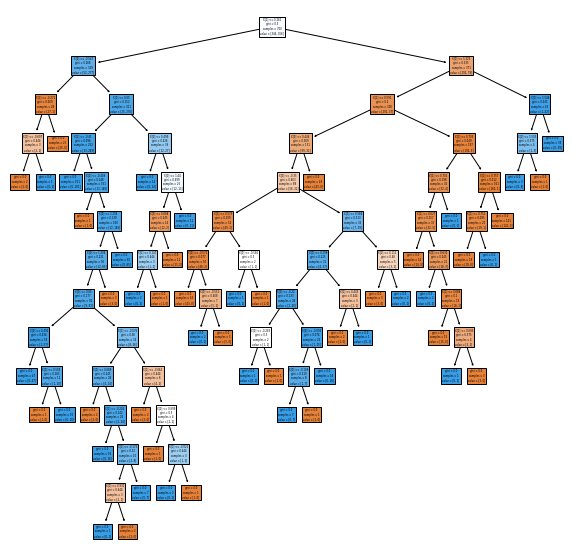

In [16]:
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled = True);

In [17]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

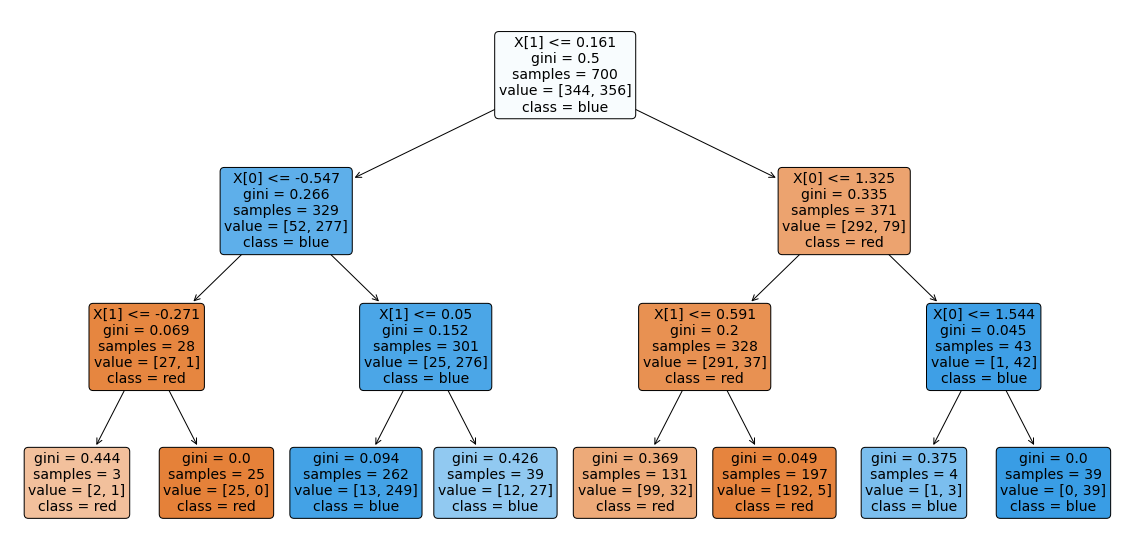

In [19]:
plt.figure(figsize=(20, 10))
tree.plot_tree(model,
               class_names = ['red', 'blue'],
               filled = True,
               rounded = True,
               fontsize = 14);

In [20]:
p1=344/700
p2=356/700

1-p1**2-p2**2

0.4998530612244898

In [21]:
model.score(X_train, y_train)

0.9085714285714286

In [22]:
model.score(X_test, y_test)

0.9033333333333333

In [23]:
model.n_features_in_

2

In [24]:
model.get_depth()

3

In [25]:
model.get_n_leaves()

8

In [26]:
from sklearn.tree import export_text

tree_rules = export_text(model,
                         feature_names = ["x0", "x1"])
print(tree_rules, "\n")

|--- x1 <= 0.16
|   |--- x0 <= -0.55
|   |   |--- x1 <= -0.27
|   |   |   |--- class: 0
|   |   |--- x1 >  -0.27
|   |   |   |--- class: 0
|   |--- x0 >  -0.55
|   |   |--- x1 <= 0.05
|   |   |   |--- class: 1
|   |   |--- x1 >  0.05
|   |   |   |--- class: 1
|--- x1 >  0.16
|   |--- x0 <= 1.32
|   |   |--- x1 <= 0.59
|   |   |   |--- class: 0
|   |   |--- x1 >  0.59
|   |   |   |--- class: 0
|   |--- x0 >  1.32
|   |   |--- x0 <= 1.54
|   |   |   |--- class: 1
|   |   |--- x0 >  1.54
|   |   |   |--- class: 1
 



In [27]:
model.predict_proba([[-1, 1]])

array([[0.97461929, 0.02538071]])

In [28]:
model.predict([[-1, 1]])

array([0], dtype=int64)

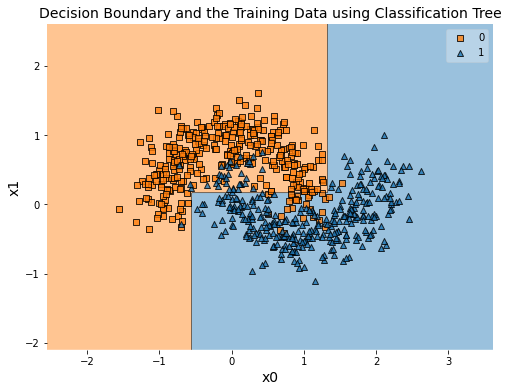

In [29]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (8, 6))

plot_decision_regions(X_train, y_train, clf = model, colors='#ff7f0e,#1f77b4')
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize = 14)
plt.title("Decision Boundary and the Training Data using Classification Tree", fontsize=14);

In [30]:
max_depth = []
mse_criterian_1 = []
mse_criterian_2 = []
mse_criterian_3 = []

for i in range(1, 21):
    model = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_gini.append(model.score(X_test,y_test))

    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_entropy.append(model.score(X_test,y_test))

    max_depth.append(i)
    
d = pd.DataFrame({'max_depth': max_depth,
                  'acc_gini': acc_gini,
                  'acc_entropy': acc_entropy})
d

,max_depth,acc_gini,acc_entropy
0,1,0.823333,0.823333
1,2,0.903333,0.903333
2,3,0.903333,0.903333
3,4,0.896667,0.903333
4,5,0.943333,0.916667
5,6,0.950000,0.950000
6,7,0.926667,0.946667
7,8,0.933333,0.950000
8,9,0.920000,0.943333
9,10,0.913333,0.943333


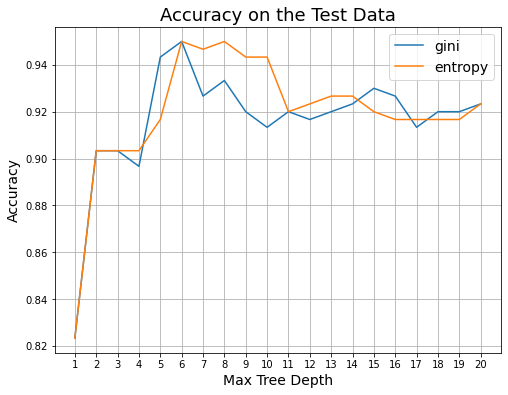

In [31]:
plt.figure(figsize = (8, 6))

plt.plot(d.max_depth, d.acc_gini, label='gini')
plt.plot(d.max_depth, d.acc_entropy, label='entropy')
plt.xlabel('Max Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy on the Test Data', fontsize=18)
plt.grid()
plt.xticks(max_depth)
plt.legend(fontsize=14);

In [32]:
from sklearn.model_selection import GridSearchCV

gs_model = GridSearchCV(estimator = tree.DecisionTreeClassifier(), 
                 param_grid={'max_depth': range(1, 21),
                             'min_samples_split': range(2, 20),
                             'criterion': ['gini', 'entropy']},
                 cv=10,
                 scoring="accuracy")

In [33]:
gs_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_split': range(2, 20)},
             scoring='accuracy')

In [34]:
print(gs_model.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 6}


In [35]:
print(gs_model.best_score_)

0.9357142857142857


In [36]:
gs_model.score(X_test, y_test)

0.95

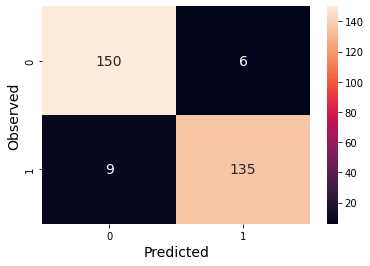

In [37]:
y_pred = gs_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":14},
           xticklabels=['0', '1'],
           yticklabels=['0', '1'],
           fmt=".0f")
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Observed', fontsize=14);

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       156
           1       0.96      0.94      0.95       144

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## 2) Create decision tree classifier for diabetes data set

In [39]:
df = pd.read_csv('diabetes.csv')
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
X = df.drop('Outcome', axis='columns')
y = df.Outcome

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
X_train.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29
102,0,125,96,0,0,22.5,0.262,21


In [45]:
X_test.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
619,0,119,0,0,0,32.4,0.141,24
198,4,109,64,44,99,34.8,0.905,26
538,0,127,80,37,210,36.3,0.804,23
329,6,105,70,32,68,30.8,0.122,37
302,5,77,82,41,42,35.8,0.156,35


In [46]:
from sklearn.impute import SimpleImputer

columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

imputer = SimpleImputer(missing_values=0,strategy='mean').fit(X_train[columns])

X_train[columns] = imputer.transform(X_train[columns])

X_train.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
71,5,139.0,64.000000,35.00000,140.000000,28.6,0.411,26
106,1,96.0,122.000000,28.64752,155.333333,22.4,0.207,27
270,10,101.0,86.000000,37.00000,155.333333,45.6,1.136,38
435,0,141.0,72.241313,28.64752,155.333333,42.4,0.205,29
102,0,125.0,96.000000,28.64752,155.333333,22.5,0.262,21


In [47]:
X_test[columns] = imputer.transform(X_test[columns])

X_test.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
619,0,119.0,72.241313,28.64752,155.333333,32.4,0.141,24
198,4,109.0,64.000000,44.00000,99.000000,34.8,0.905,26
538,0,127.0,80.000000,37.00000,210.000000,36.3,0.804,23
329,6,105.0,70.000000,32.00000,68.000000,30.8,0.122,37
302,5,77.0,82.000000,41.00000,42.000000,35.8,0.156,35


In [48]:
full_model = tree.DecisionTreeClassifier()

full_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
full_model.score(X_train, y_train)

1.0

In [50]:
full_model.score(X_test, y_test)

0.696969696969697

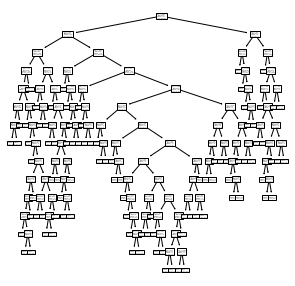

In [51]:
plt.figure(figsize=(5,5))
tree.plot_tree(full_model);

In [52]:
full_model.get_n_leaves()

94

In [53]:
full_model.get_depth()

14

In [54]:
importance = full_model.feature_importances_
importance

array([0.0377168 , 0.33139412, 0.06531949, 0.06171898, 0.04310743,
       0.16587271, 0.15176605, 0.14310442])

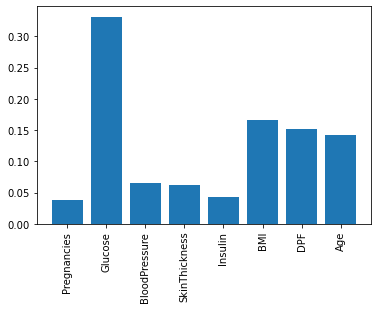

In [55]:
position = range(len(importance))
plt.bar(position, importance)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
plt.xticks(position, features, rotation=90);

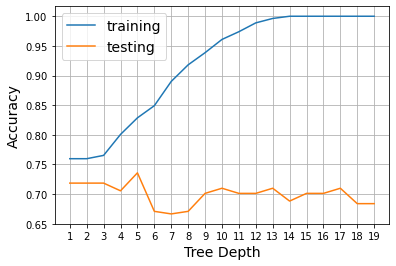

In [56]:
max_depth = []
acc_train = []
acc_test = []

for i in range(1, 20):
    tree_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=i)
    tree_model.fit(X_train, y_train)
    acc_train.append(tree_model.score(X_train, y_train))
    acc_test.append(tree_model.score(X_test, y_test))
    
    max_depth.append(i)

d = pd.DataFrame({'max_depth' : max_depth,
                  'acc_train': acc_train,
                  'acc_test': acc_test})

plt.plot(d.max_depth, d.acc_train, label='training')
plt.plot(d.max_depth, d.acc_test, label='testing')
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(max_depth)
plt.grid()
plt.legend(fontsize=14);

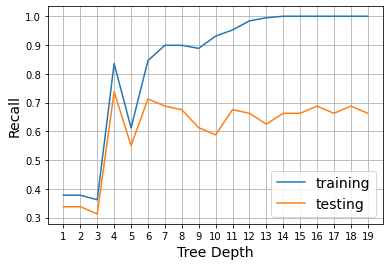

In [57]:
max_depth = []
recall_train = []
recall_test = []

for i in range(1, 20):
    tree_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=i)
    tree_model.fit(X_train, y_train)
    y_pred_train = tree_model.predict(X_train)
    y_pred_test = tree_model.predict(X_test)
    recall_train.append(recall_score(y_train, y_pred_train))
    recall_test.append(recall_score(y_test, y_pred_test))
    
    max_depth.append(i)

d = pd.DataFrame({'max_depth' : max_depth,
                  'recall_train': recall_train,
                  'recall_test': recall_test})

plt.plot(d.max_depth, d.recall_train, label='training')
plt.plot(d.max_depth, d.recall_test, label='testing')
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.xticks(max_depth)
plt.grid()
plt.legend(fontsize=14);

In [58]:
gs = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), 
                 param_grid={'max_depth': range(1, 21),
                             'min_samples_split': range(2, 20, 1),
                             'criterion': ['gini', 'entropy']},
                 cv=5,
                 scoring="recall")

In [59]:
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
0.7341394025604553


In [60]:
gs.score(X_test, y_test)

0.7625

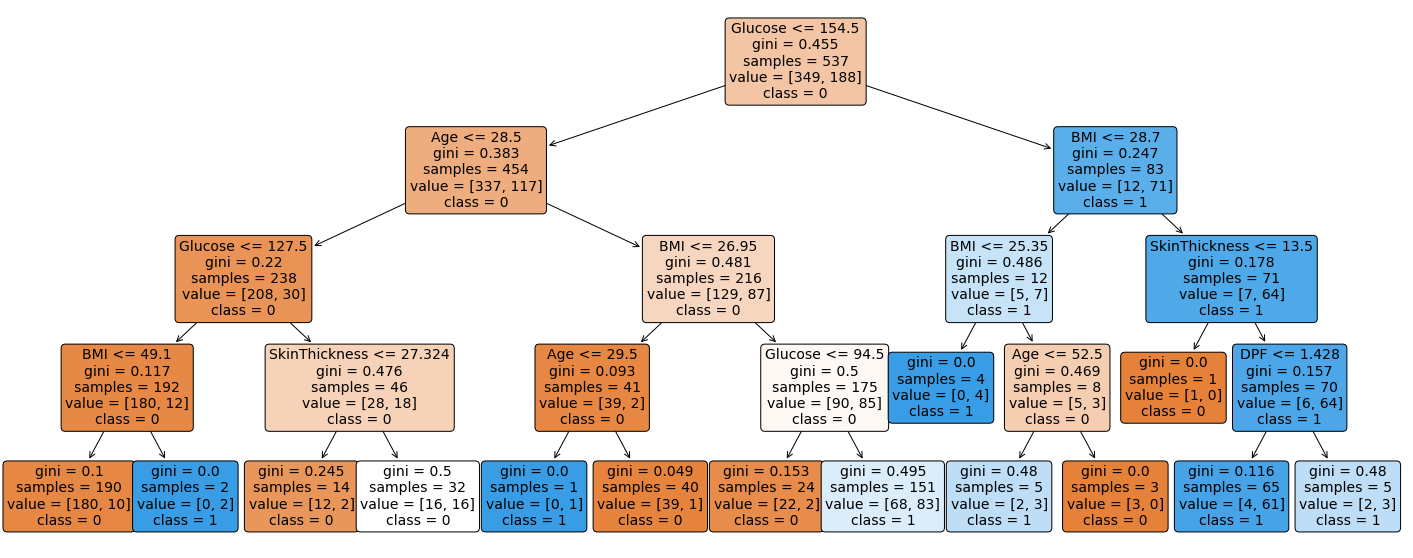

In [61]:
plt.figure(figsize=(25,10))

tree.plot_tree(gs.best_estimator_,
               feature_names = features,
               class_names = ['0', '1'],
               filled = True,
               rounded = True,
               fontsize = 14);

In [62]:
#pruning

path = full_model.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00121043, 0.00122006, 0.00162942, 0.00174732,
        0.00179057, 0.00183812, 0.00184495, 0.00223464, 0.00223464,
        0.00227602, 0.00247099, 0.00248293, 0.00248293, 0.00251397,
        0.00251397, 0.00273986, 0.00275748, 0.0027933 , 0.0027933 ,
        0.0027933 , 0.00288641, 0.00297952, 0.00319234, 0.00321274,
        0.00331588, 0.00338581, 0.00345415, 0.00381989, 0.00387375,
        0.00390175, 0.00414015, 0.00438947, 0.00442045, 0.00469482,
        0.00475777, 0.00481651, 0.00581966, 0.00588698, 0.00629186,
        0.0066157 , 0.01494214, 0.0167727 , 0.02361865, 0.03229496,
        0.09336841]),
 'impurities': array([0.        , 0.00363128, 0.00729147, 0.01055031, 0.01753957,
        0.02112072, 0.02479696, 0.02848686, 0.03295614, 0.03742541,
        0.04425347, 0.05413744, 0.05662037, 0.0591033 , 0.06161727,
        0.06413123, 0.08878998, 0.09706244, 0.10544233, 0.10823562,
        0.11102892, 0.11968814, 0.12266765, 0.12585999, 0.13871095

In [63]:
ccp_alphas = path['ccp_alphas']
ccp_alphas

array([0.        , 0.00121043, 0.00122006, 0.00162942, 0.00174732,
       0.00179057, 0.00183812, 0.00184495, 0.00223464, 0.00223464,
       0.00227602, 0.00247099, 0.00248293, 0.00248293, 0.00251397,
       0.00251397, 0.00273986, 0.00275748, 0.0027933 , 0.0027933 ,
       0.0027933 , 0.00288641, 0.00297952, 0.00319234, 0.00321274,
       0.00331588, 0.00338581, 0.00345415, 0.00381989, 0.00387375,
       0.00390175, 0.00414015, 0.00438947, 0.00442045, 0.00469482,
       0.00475777, 0.00481651, 0.00581966, 0.00588698, 0.00629186,
       0.0066157 , 0.01494214, 0.0167727 , 0.02361865, 0.03229496,
       0.09336841])

In [64]:
pruning_model = GridSearchCV(estimator = tree.DecisionTreeClassifier(), 
                             param_grid={'ccp_alpha': [alpha for alpha in ccp_alphas]},
                             cv=5,
                             scoring="recall")

In [65]:
pruning_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.0012104283054003714,
                                       0.001220060360881014,
                                       0.0016294227188081937,
                                       0.00174731506453477,
                                       0.0017905744162727414,
                                       0.0018381172542220495,
                                       0.0018449548244706565,
                                       0.0022346368715083797,
                                       0.0022346368715083797,
                                       0.0022760190357955725,
                                       0.002470992694456382,
                                       0.002482929857231533,
                                       0.0024829...
                                       0.0025139664804469273,
                                       0.0025139664804469273,
                         

In [66]:
print(pruning_model.best_params_)
print(pruning_model.best_estimator_)

{'ccp_alpha': 0.014942143969562588}
DecisionTreeClassifier(ccp_alpha=0.014942143969562588)


In [67]:
print(pruning_model.best_score_) 

0.766145092460882


In [68]:
pruning_model.score(X_test, y_test)

0.7625

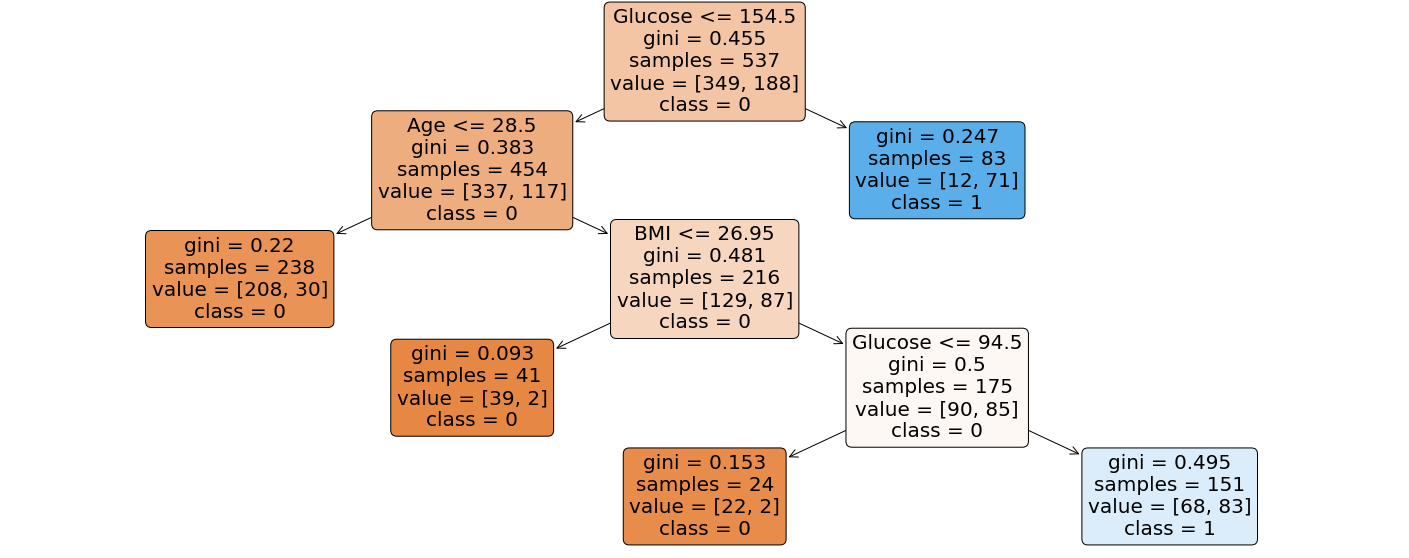

In [69]:
plt.figure(figsize=(25,10))

tree.plot_tree(pruning_model.best_estimator_,
               feature_names = features,
               class_names = ['0', '1'],
               filled = True,
               rounded = True,
               fontsize = 20);